# Observable Trends

The data below analyzes the relationships between city latitudes and multiple factors including wind speed, humidity, max temperature, and cloudiness. 

1. There is a negative trend between maximum temperature and increasing latitude. The inverse is true for maximum temperature and decreasing latitude. This is an obvious trend as the farther away from the equator we go, the temperature continues to decrease and vice versa. 

2. Based on the data below, it appears that humidity percentage in the northern and southern hemisphere have little to no correlation. There are significantly less cities analyzed in the southern hemisphere within this dataset which could impact the overall results. 

3. Similarly, there appears to be no trend between the cloudiness and relationship between city latitude in both the northern and southern hemispheres. 

In [1]:
# Dependencies and Setup
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
# cities=cities[:5]

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url= base_url +  api_key + "&q=" + city
print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9535eb11d60ce28ef59e939de006a6c9&q=wanning


In [5]:
# Create a base URL

# base_url="http://api.openweathermap.org/data/2.5/weather?"

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

#Create a counter for records retreival
record=1

#create a dataframe for cities


city_weather= pd.DataFrame({"City": cities})

#Create empty lists to append values of lat, lon, max temp, humidity, cloud coverage, wind speed, country, datetime

city_weather["Lat"]= ""
city_weather["Lng"]= ""
city_weather["Max Temp"]= ""
city_weather["Humidity"]=""
city_weather["Cloudiness"]= ""
city_weather["Wind Speed"]= ""
city_weather["Country"]= ""
city_weather["Date"]= ""


#Print beginning of loop 
print("Begin Data Retrieval")
print("-------------------------")



#loop through cities_pd and add rows

for index, row in city_weather.iterrows():
    
    city=row["City"]
    
    query_url= base_url + api_key + "&q=" + city
    weather_response=requests.get(query_url).json()
     
                                        
    try:
        print(f"Processing Record {record} | {city} ")
                                        
        city_weather.loc[index, "Lat"]=weather_response["coord"]["lat"]
        city_weather.loc[index, "Lng"]=weather_response["coord"]["lon"]
        city_weather.loc[index, "Max Temp"]=weather_response["main"]["temp_max"]
        city_weather.loc[index, "Humidity"]=weather_response["main"]["humidity"]
        city_weather.loc[index, "Cloudiness"]=weather_response["clouds"]["all"]
        city_weather.loc[index, "Wind Speed"]=weather_response["wind"]["speed"]
        city_weather.loc[index, "Country"]=weather_response["sys"]["country"]
        city_weather.loc[index, "Date"]=weather_response["dt"]
       

    except:
        
        print("City not found. Skipping...")
        
        
    
    record=record +1       


print("----------------------")
print("Data Retrival Complete")
print("----------------------")

Begin Data Retrieval
-------------------------
Processing Record 1 | tucurui 
Processing Record 2 | atherton 
Processing Record 3 | kimbe 
Processing Record 4 | barentsburg 
City not found. Skipping...
Processing Record 5 | cabo san lucas 
Processing Record 6 | new norfolk 
Processing Record 7 | taolanaro 
City not found. Skipping...
Processing Record 8 | cidreira 
Processing Record 9 | bredasdorp 
Processing Record 10 | victor harbor 
Processing Record 11 | yima 
Processing Record 12 | albany 
Processing Record 13 | cherskiy 
Processing Record 14 | alofi 
Processing Record 15 | maarianhamina 
Processing Record 16 | moses lake 
Processing Record 17 | novyy nekouz 
Processing Record 18 | puga 
Processing Record 19 | yellowknife 
Processing Record 20 | richards bay 
Processing Record 21 | ushuaia 
Processing Record 22 | lemesos 
City not found. Skipping...
Processing Record 23 | mataura 
Processing Record 24 | wanlaweyn 
Processing Record 25 | hilo 
Processing Record 26 | calvinia 
Proce

Processing Record 224 | carnarvon 
Processing Record 225 | kavieng 
Processing Record 226 | loralai 
Processing Record 227 | bandarbeyla 
Processing Record 228 | antalaha 
Processing Record 229 | victoria 
Processing Record 230 | vanimo 
Processing Record 231 | shelburne 
Processing Record 232 | esperance 
Processing Record 233 | adelanto 
Processing Record 234 | champerico 
Processing Record 235 | qaanaaq 
Processing Record 236 | torbay 
Processing Record 237 | goderich 
Processing Record 238 | upernavik 
Processing Record 239 | wanaka 
Processing Record 240 | dryden 
Processing Record 241 | magistralnyy 
Processing Record 242 | half moon bay 
Processing Record 243 | scottsburgh 
City not found. Skipping...
Processing Record 244 | samoded 
Processing Record 245 | umm lajj 
Processing Record 246 | zhangye 
Processing Record 247 | bongandanga 
Processing Record 248 | wakkanai 
Processing Record 249 | bilma 
Processing Record 250 | samalaeulu 
City not found. Skipping...
Processing Recor

Processing Record 454 | evensk 
Processing Record 455 | quatre cocos 
Processing Record 456 | college 
Processing Record 457 | ambon 
Processing Record 458 | araguatins 
City not found. Skipping...
Processing Record 459 | ust-kuyga 
Processing Record 460 | cap malheureux 
Processing Record 461 | west wendover 
Processing Record 462 | cece 
Processing Record 463 | yulara 
Processing Record 464 | chauk 
Processing Record 465 | santa eulalia del rio 
City not found. Skipping...
Processing Record 466 | acapulco 
Processing Record 467 | ry 
City not found. Skipping...
Processing Record 468 | altinopolis 
Processing Record 469 | teya 
Processing Record 470 | manggar 
Processing Record 471 | meulaboh 
Processing Record 472 | nizhneyansk 
City not found. Skipping...
Processing Record 473 | fukue 
Processing Record 474 | amapa 
Processing Record 475 | mapimi 
Processing Record 476 | toora-khem 
Processing Record 477 | kongoussi 
Processing Record 478 | zhitikara 
City not found. Skipping...
Pro

In [6]:
weather_response

{'coord': {'lon': 110.3967, 'lat': 18.8003},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 76.19,
  'feels_like': 77.74,
  'temp_min': 76.19,
  'temp_max': 76.19,
  'pressure': 1014,
  'humidity': 90,
  'sea_level': 1014,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 13.2, 'deg': 62, 'gust': 19.24},
 'clouds': {'all': 96},
 'dt': 1666727400,
 'sys': {'country': 'CN', 'sunrise': 1666737345, 'sunset': 1666778931},
 'timezone': 28800,
 'id': 1791779,
 'name': 'Wanning',
 'cod': 200}

In [7]:
temp=weather_response["dt"]
time=dt.datetime.fromtimestamp(temp)

time.strftime('%Y-%m-%d %H:%M:%S')


'2022-10-25 15:50:00'

In [8]:
time.strftime("%x")


'10/25/22'

# Convert Raw Data to DataFrame

In [9]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tucurui,-3.7661,-49.6725,89.42,53,100,5.53,BR,1666727191
1,atherton,53.5237,-2.4935,59.14,85,100,7,GB,1666727191
2,kimbe,-5.5502,150.143,75.49,90,82,3.22,PG,1666727191
3,barentsburg,,,,,,,,
4,cabo san lucas,22.8909,-109.912,88.61,57,16,6.93,MX,1666726932


In [10]:
city_weather["Lat"]=pd.to_numeric(city_weather["Lat"], errors='coerce')
city_weather["Lng"]=pd.to_numeric(city_weather["Lng"], errors='coerce')
city_weather["Max Temp"]=pd.to_numeric(city_weather["Max Temp"], errors='coerce')
city_weather["Humidity"]=pd.to_numeric(city_weather["Humidity"], errors='coerce')
city_weather["Cloudiness"]=pd.to_numeric(city_weather["Cloudiness"], errors='coerce')
city_weather["Wind Speed"]=pd.to_numeric(city_weather["Wind Speed"], errors='coerce')

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tucurui,-3.7661,-49.6725,89.42,53.0,100.0,5.53,BR,1666727191
1,atherton,53.5237,-2.4935,59.14,85.0,100.0,7.00,GB,1666727191
2,kimbe,-5.5502,150.1429,75.49,90.0,82.0,3.22,PG,1666727191
3,barentsburg,NaN,NaN,NaN,NaN,NaN,NaN,,
4,cabo san lucas,22.8909,-109.9124,88.61,57.0,16.0,6.93,MX,1666726932
...,...,...,...,...,...,...,...,...,...
582,olinda,-8.0089,-34.8553,82.13,65.0,75.0,9.22,BR,1666727216
583,zachagansk,NaN,NaN,NaN,NaN,NaN,NaN,,
584,guelengdeng,NaN,NaN,NaN,NaN,NaN,NaN,,
585,nuevitas,21.5453,-77.2644,81.36,67.0,14.0,8.14,CU,1666727398


In [11]:
city_weather.to_csv("weather_csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.

In [12]:
humidity_100=city_weather[(city_weather["Humidity"] >100)].index
humidity_100

Int64Index([], dtype='int64')

After inspecting the data, no cities were found to have a humidity>100%

# Plotting the Data

# Latitude vs. Temperature Plot

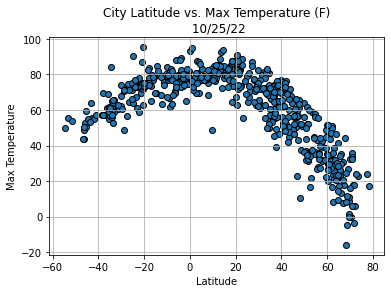

In [14]:
#Temperature Vs. Latitude
x_lat=city_weather["Lat"]
y_temp=city_weather["Max Temp"]
plt.scatter(x_lat, y_temp, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs. Max Temperature (F)\n {time.strftime('%x')}")
plt.grid()
plt.savefig("./weatherpy_images/lat_temp_scatter")
plt.show()

The scatter plot above visualizes the relationship between city latitudes and max temperature in Farenheight. The relationship between the two appears to create a normal distribution. 

# Latitude vs. Humidity Plot

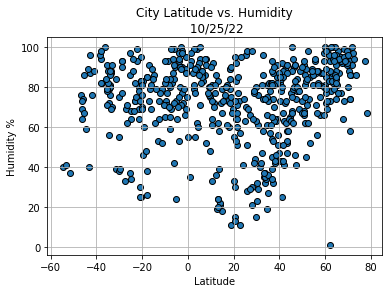

In [15]:
x_lat=city_weather["Lat"]
y_hum=city_weather["Humidity"]
plt.scatter(x_lat, y_hum, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity\n {time.strftime('%x')}")
plt.grid()
plt.savefig("./weatherpy_images/lat_humidity_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and humidity. The majority of cities analyzed appear to have a humidity percent greater than 60%. 

# Latitude vs. Cloudiness Plot

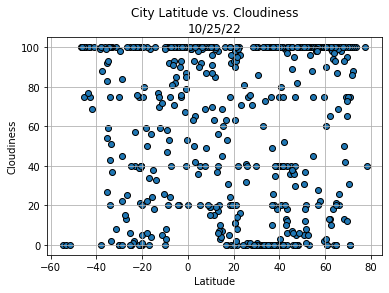

In [16]:
x_lat=city_weather["Lat"]
y_cloud=city_weather["Cloudiness"]
plt.scatter(x_lat, y_cloud, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness\n{time.strftime('%x')}")
plt.grid()
plt.savefig("./weatherpy_images/lat_cloud_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and cloudiness. There appears to be no correlation between the two variables.

# Latitude vs. Wind Speed Plot

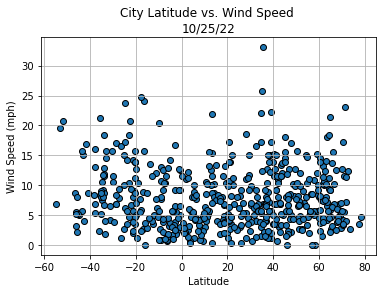

In [17]:
x_lat=city_weather["Lat"]
y_wind=city_weather["Wind Speed"]
plt.scatter(x_lat, y_wind, marker='o',edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed \n{time.strftime('%x')}")
plt.grid()
plt.savefig("./weatherpy_images/lat_wind_scatter")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed. The majority of cities analyzed have a wind speed less than 15 mph.

# Linear Regression

In [18]:
northern_weather=city_weather.loc[city_weather["Lat"]>=0]
northern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,atherton,53.5237,-2.4935,59.14,85.0,100.0,7.00,GB,1666727191
4,cabo san lucas,22.8909,-109.9124,88.61,57.0,16.0,6.93,MX,1666726932
10,yima,34.7381,111.8839,53.67,81.0,100.0,2.95,CN,1666727194
11,albany,42.6001,-73.9662,71.38,89.0,99.0,3.00,US,1666726981
12,cherskiy,68.7500,161.3000,-4.85,92.0,42.0,6.89,RU,1666727195
...,...,...,...,...,...,...,...,...,...
579,takoradi,4.8845,-1.7554,78.30,86.0,90.0,5.53,GH,1666727397
580,qaqortoq,60.7167,-46.0333,29.77,69.0,0.0,5.84,GL,1666727397
581,ibadan,7.3878,3.8964,78.69,94.0,40.0,2.30,NG,1666727398
585,nuevitas,21.5453,-77.2644,81.36,67.0,14.0,8.14,CU,1666727398


In [19]:
southern_weather=city_weather.loc[city_weather["Lat"]<=0]
southern_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tucurui,-3.7661,-49.6725,89.42,53.0,100.0,5.53,BR,1666727191
2,kimbe,-5.5502,150.1429,75.49,90.0,82.0,3.22,PG,1666727191
5,new norfolk,-42.7826,147.0587,54.91,87.0,100.0,4.00,AU,1666727192
7,cidreira,-30.1811,-50.2056,67.95,75.0,0.0,15.73,BR,1666727193
8,bredasdorp,-34.5322,20.0403,61.48,72.0,100.0,9.15,ZA,1666727193
...,...,...,...,...,...,...,...,...,...
572,sorong,-0.8833,131.2500,79.21,87.0,85.0,6.53,ID,1666727394
573,itaituba,-4.2761,-55.9836,87.96,70.0,20.0,5.75,BR,1666727394
575,garut,-7.2024,107.8878,68.59,99.0,100.0,0.94,ID,1666727395
577,salta,-24.7859,-65.4117,90.19,34.0,40.0,17.27,AR,1666727396


# Northern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7525624582913536


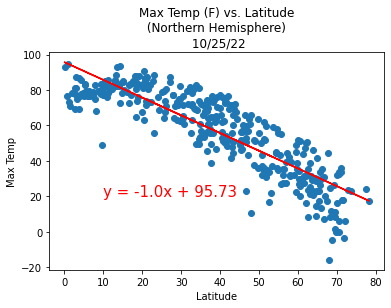

In [20]:

x_value=northern_weather["Lat"]
y_ntemp=northern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_ntemp)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_ntemp)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Max Temp (F) vs. Latitude\n (Northern Hemisphere) \n {time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/temp_lat_north_regression")
plt.show()

The linear regression model above indicates that max temperatutre and latitude are highly dependent on each other. As evidenced by the r-squared value. This graph would be a useful predictive model. As the latitude increases, the temperature decreases in the northern hemisphere.

In [21]:
#Southern Hemisphere-Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5795164560797816


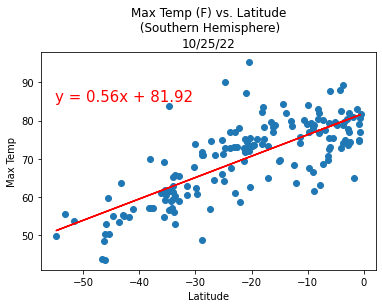

In [22]:

x_svalue=southern_weather["Lat"]
y_stemp=southern_weather["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, y_stemp)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, y_stemp)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Max Temp (F) vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/temp_lat_south_regression")
plt.show()

The relationship between max temperature and latitude in the southern hemisphere is positive as displayed by the r-squared value. And thus, can be used as a predictive model. As the latitude decreases, the max temperature incerases. It is clear that the southern hemisphere has significantly less cities to analyze compared to the northern hemisphere. This may be the reason the r-squared value is not as strong as the northern hemisphere's. 

In [23]:
#Northern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.08222495979043003


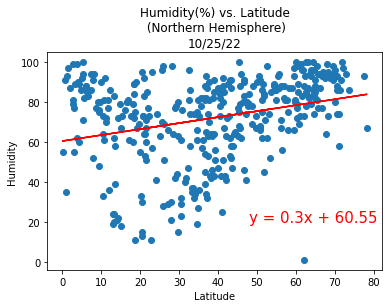

In [24]:
x_value=northern_weather["Lat"]
n_hum=northern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_hum)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_hum)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity(%) vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/humidity_lat_north_regression")
plt.show()

The scatter plot above analyzes the realtionship between humidity percentage and city latitude in the northern hemisphere. The r-squared value in this example is weak and therefore this would not be a valuable predictive model. 

In [25]:
#Southern Hemisphere-Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.018374730111402577


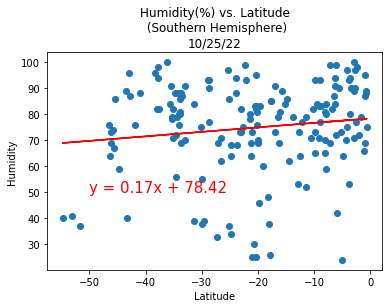

In [35]:
x_svalue=southern_weather["Lat"]
s_hum=southern_weather["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_hum)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_hum)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity(%) vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/humidity_lat__south_regression")
plt.show()

The scatter plot above analyzes the relationship between humidity percentage and city latitude in the southern hemisphere. The r-squared value itself is too low to have any predictive value between the two variables. 

In [27]:
#Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.008927235893549613


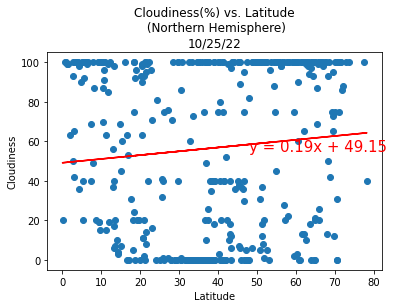

In [28]:
x_value=northern_weather["Lat"]
n_cloud=northern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_cloud)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_cloud)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(48,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness(%) vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/cloud_lat_north_regression")
plt.show()

The scatter plot above analyzes the linear regression between cloudiness and city latitude in the northern hemisphere. The variable values appear to have no dependency on each other. This would not be a useful predictive model. 

In [29]:
#Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

The r-squared is: 0.005762364524685234


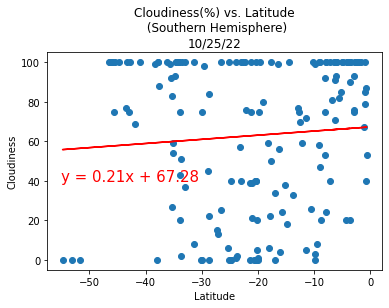

In [30]:
x_svalue=southern_weather["Lat"]
s_cloud=southern_weather["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_cloud)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_cloud)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness(%) vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/cloud_lat_south_regression")
plt.show()

The scatter plot above analyzes the relationship between cloudiness and city latitude int he southern hemisphere. We cannot predict the dependency of cloudiness to latitude due to the weak r-squared value.

In [31]:
#Northern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01434545122965036


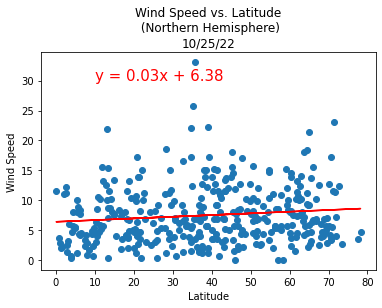

In [32]:
x_value=northern_weather["Lat"]
n_wind=northern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, n_wind)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, n_wind)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Wind Speed vs. Latitude\n (Northern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/wind_lat_north_regression")
plt.show()

The scatter plot above analyzes the relationship between city latitude and wind speed in the northern hemisphere. The r-squared value is a poor indication of the dependency of wind speed to city latitude. 

In [33]:
#Southern Hemisphere-Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0633494668382106


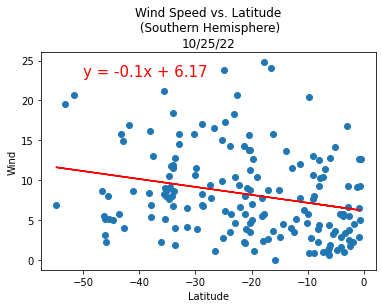

In [36]:
x_svalue=southern_weather["Lat"]
s_wind=southern_weather["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_svalue, s_wind)
regress_values = x_svalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_svalue, s_wind)
plt.plot(x_svalue, regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title(f"Wind Speed vs. Latitude\n (Southern Hemisphere)\n{time.strftime('%x')}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("./weatherpy_images/wind_lat_south_regression")
plt.show()

The scatter plot above analyzes relationship between wind speed and city latitude in the southern hemisphere. The linear regression model and r-squared value are again, not a useful predictive model of the relationship between increasing latitude and wind speed. 